In [148]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from matplotlib import pyplot as plt

In [36]:
tickers = pd.read_csv('data/spy/tickers.csv', header=None)[1].tolist()

In [179]:
# calculate cumulative product of the mean of all daily returns
# i.e. simulate growth of $1 by equally weighting all current S&P 500
# constituents
sim_rsp = pd.concat(
        [pd.read_csv(f"data/price/{ticker}.csv", index_col='Date', parse_dates=True)[
            'Close'
        ].rename(ticker)
        for ticker in tickers],
        axis=1,
        sort=True,
    )

sim_rsp_shift = sim_rsp.shift(1, axis=0)
sim_rsp_pct = (sim_rsp  - sim_rsp_shift) / sim_rsp_shift
sim_rsp_pct = sim_rsp_pct.replace([np.inf, -np.inf], np.nan)

df_sim_rsp = sim_rsp_pct.mean(axis=1, skipna=True) + 1
df_sim_rsp = df_sim_rsp['2003-05-01':].cumprod().rename("SIM")

In [191]:
df_sim_rsp.tail()

Date
2019-07-11    9.572254
2019-07-12    9.642153
2019-07-15    9.632375
2019-07-16    9.617813
2019-07-17    9.580047
Name: SIM, dtype: float64

In [174]:
# actual RSP data
rsp = (
    (pd.read_csv(f"data/price/rsp.csv", index_col='Date', parse_dates=True)["Adj Close"]
.pct_change() + 0.002 / 252 + 1)  # 0.20% annual ER
.cumprod()
.rename("RSP")
)

In [185]:
rsp.tail()

Date
2019-07-23    5.613428
2019-07-24    5.650912
2019-07-25    5.614543
2019-07-26    5.642796
2019-07-29    5.640789
Name: RSP, dtype: float64

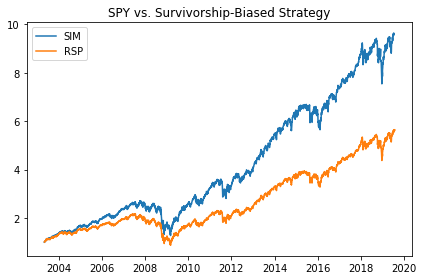

In [190]:
plt.title('SPY vs. Survivorship-Biased Strategy')
plt.plot(df_sim_rsp, label='SIM')
plt.plot(rsp, label='RSP')
plt.legend()
plt.tight_layout()
plt.show()